In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd drive/MyDrive

/content/drive/MyDrive


In [3]:
# !pip install sentencepiece
!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.4/143.4 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 20.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached Cython-0.29.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 48.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 54.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 54.6 MB/s eta 0:00:00
  Preparing metadata 

In [4]:
from tqdm import tqdm
from sklearn.feature_extraction.text import CountVectorizer
from bertopic import BERTopic
import os
import json

In [27]:
!pip install fasttext
import fasttext
from sklearn.cluster import KMeans
import numpy as np
from gensim import models

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.11.1-py3-none-any.whl (227 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4199772 sha256=167171ad8d8cd9638016cd64064eb0d56326def5bca9274a7940bb7dd0164f60
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


In [28]:
model_path = '/content/drive/MyDrive/jolnon/cc.ko.100.bin'

m_fasttext = models.fasttext.load_facebook_model(model_path)

ERROR:gensim.models._fasttext_bin:failed to decode invalid unicode bytes b'\xed\xa1\x9c'; replacing invalid characters, using '\\xed\\xa1\\x9c'
ERROR:gensim.models._fasttext_bin:failed to decode invalid unicode bytes b'\xed\xb0\x80'; replacing invalid characters, using '\\xed\\xb0\\x80'
ERROR:gensim.models._fasttext_bin:failed to decode invalid unicode bytes b'\xed\xa7\x80'; replacing invalid characters, using '\\xed\\xa7\\x80'
ERROR:gensim.models._fasttext_bin:failed to decode invalid unicode bytes b'\xed\xb8\xb0'; replacing invalid characters, using '\\xed\\xb8\\xb0'
ERROR:gensim.models._fasttext_bin:failed to decode invalid unicode bytes b'\xed\xa0\x9c'; replacing invalid characters, using '\\xed\\xa0\\x9c'
ERROR:gensim.models._fasttext_bin:failed to decode invalid unicode bytes b'\xed\xa6\xac'; replacing invalid characters, using '\\xed\\xa6\\xac'
ERROR:gensim.models._fasttext_bin:failed to decode invalid unicode bytes b'\xed\xb3\xb5'; replacing invalid characters, using '\\xed\\xb

In [7]:
import os
import json
import re
from zipfile import ZipFile

cond = re.compile('[가-힣]+')

def get_data_from_zip(zip_name):
    zip_file_path = '/content/drive/MyDrive/jolnon/' + zip_name + '.zip'
    extract_path = '/content/' + zip_name

    with ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

    result = []
    for name in os.listdir(path=extract_path):
        file_path = os.path.join(extract_path, name)
        if os.path.isdir(file_path):
            for name in os.listdir(path=file_path):
                with open(file_path + '/' + name, 'r', encoding='utf-8') as f:
                    data = json.load(f)
                    valid = []
                    for d in data['content'].split('\n'):
                        res = []
                        for word in d.split(' '):
                            if cond.match(word) != None:
                                res.append(word)
                        d = ' '.join(res)
                        if d and not d.replace(' ', '').isdecimal():
                            valid.append(d)
                    result.append('\n'.join([data['title']] + valid))
        else:
            with open(extract_path + '/' + name, 'r', encoding='utf-8') as f:
                data = json.load(f)
                valid = []
                for d in data['content'].split('\n'):
                    res = []
                    for word in d.split(' '):
                        if cond.match(word) != None:
                            res.append(word)
                    d = ' '.join(res)
                    if d and not d.replace(' ', '').isdecimal():
                        valid.append(d)
                result.append('\n'.join([data['title']] + valid))
    return result


In [8]:
import random
random.seed(42)
galleries = ['animal','tree']
dataset = []
for e in galleries:
  dataset.append([get_data_from_zip(e)])
cocktail = []
for data in dataset:
  for sen in data:
    cocktail+=sen

In [9]:
def remove_words(sentence, word):
    return ' '.join([w.replace(word, '') for w in sentence.split()])
stopwords = ['-dc', 'official', 'App', '이미지' ,'순서','저장','일베','.jpg','.png','.txt','.gif','ㅋㅋ','ㅋ','jpg','png','txt','gif','씨발']
for i in range(len(cocktail)):
  for j in range(len(stopwords)):
    cocktail[i] = remove_words(cocktail[i],stopwords[j])

In [10]:
import collections

def remove_top_n_words(data, n):
    words = [word for sentence in data for word in sentence.split(' ')]
    word_count = collections.Counter(words)
    top_n_words = [word for word, _ in word_count.most_common(n)]
    for i in range(len(data)):
        for word in top_n_words:
            if word=='':
                continue
            data[i] = remove_words(data[i], word)
    return data

def remove_empty_sentences(cocktail, real_labels):
  indices = [i for i, sentence in enumerate(cocktail) if sentence.strip() != '']
  cocktail = [cocktail[i] for i in indices]
  real_labels = [real_labels[i] for i in indices]
  return cocktail, real_labels


In [11]:
real_labels = []
for i in range(len(dataset)):
  real_labels += [i] * len(dataset[i][0])
cocktail = remove_top_n_words(cocktail, 0)
cocktail, real_labels = remove_empty_sentences(cocktail, real_labels)

In [12]:
# !pip install transformers
# from transformers import AutoModel, AutoTokenizer
# model = AutoModel.from_pretrained("klue/roberta-large")
# tokenizer = AutoTokenizer.from_pretrained("klue/roberta-large")

# model = AutoModel.from_pretrained("klue/bert-base")
# tokenizer = AutoTokenizer.from_pretrained("klue/bert-base")
# bertopic_model_embed_token = BERTopic(embedding_model=model,
#                                       vectorizer_model=vectorizer,
#                                       ctfidf_model=ctfidf_model,
#                                       nr_topics=100,
#                                       top_n_words=1,
#                                       calculate_probabilities=False)

In [13]:
from bertopic.vectorizers import ClassTfidfTransformer
ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)
bertopic_model_embed_token = BERTopic(language='multilingual',
                          nr_topics=100,
                          top_n_words=1)
topics, _ = bertopic_model_embed_token.fit_transform(cocktail)

In [14]:
topic_info = bertopic_model_embed_token.get_topic_info()
number_of_topics = len(topic_info) - 1
print(f"생성된 주제의 수: {number_of_topics}")
lst = []
for index, row in topic_info.iterrows():
    topic_num = row['Topic']
    if topic_num != -1:
        topic_name = row['Name']
        pure_topic_name = "_".join(topic_name.split("_")[1:])
        lst.append(pure_topic_name)

생성된 주제의 수: 99


In [15]:
### Reducing outliers
topics = bertopic_model_embed_token.reduce_outliers(cocktail, topics, strategy="c-tf-idf", threshold=0.1)
topics = bertopic_model_embed_token.reduce_outliers(cocktail, topics, strategy="distributions")

In [16]:
hierarchical_topics = bertopic_model_embed_token.hierarchical_topics(cocktail)

100%|██████████| 98/98 [00:00<00:00, 124.14it/s]


In [17]:
# bertopic_model_embed_token.visualize_hierarchy(hierarchical_topics=hierarchical_topics)

In [18]:
verify = True
table = [[0 for r in range(2)] for t in range(max([int(x) for x in hierarchical_topics['Parent_ID']]) + 1)]
if verify:
  for j in range(number_of_topics):
    for i in range(len(topics)):
      if topics[i]==j:
        table[j][real_labels[i]]+=1
  for j in range(number_of_topics, len(table)):
    row = hierarchical_topics[hierarchical_topics['Parent_ID'] == str(j)].iloc[0]
    left, right = int(row['Child_Left_ID']), int(row['Child_Right_ID'])
    for i in range(len(table[0])):
      table[j][i] += table[left][i] + table[right][i]

In [19]:
df = hierarchical_topics
selected_topics_ids = set()
for index, row in df[df['Distance'] >= 1].iterrows():
    left_child = df[df['Parent_ID'] == row['Child_Left_ID']]
    if not left_child.empty and left_child.iloc[0]['Distance'] < 1:
        selected_topics_ids.add(row['Child_Left_ID'])

    right_child = df[df['Parent_ID'] == row['Child_Right_ID']]
    if not right_child.empty and right_child.iloc[0]['Distance'] < 1:
        selected_topics_ids.add(row['Child_Right_ID'])
selected_topics_ids = list(selected_topics_ids)

In [20]:
post_counts = [0 for i in range(number_of_topics)]
for i in range(len(post_counts)):
    post_counts[i] = topics.count(i)

In [21]:
selected_topic_names=[]
for topic_id in selected_topics_ids:
    topic_name = df[df['Parent_ID'] == topic_id]['Parent_Name'].iloc[0]
    selected_topic_names.append(topic_name)

In [22]:
for i in range(len(selected_topic_names)):
  print(selected_topic_names[i], selected_topics_ids[i])


사진 135
해줘야 147
로보쿤 121
이름이 99
돼지 150
공간이 146
식물 153
이거 167
유튜브 168
수컷이 171
유혈목이 155
우리집 131
냄새 138
케이지 126
분갈이 162
버섯 166
동물 124
햄스터 116
나무 122
나무위키 170
쥐친구 115
꽃이 120
고양이 101
토마토 157
잠자는쥐 145


In [23]:
assert False
# 아래 chosen_topics를 설정한 후 실행하세요

AssertionError: ignored

In [24]:
ord = [2,2,0,2,0, 2,1,2,2,0, 0,2,2,0,1, 1,0,0,1,2, 0,1,0,1,0,]

In [25]:
chosen_topics = ['동물', '식물']

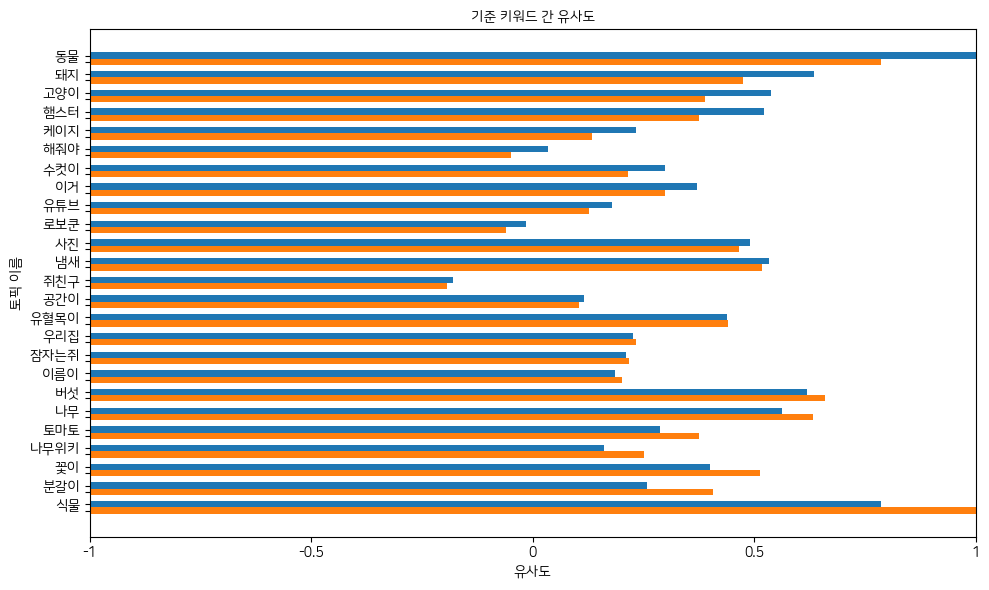

In [29]:
import warnings
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

def cos_sim(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

def showTopicDistance(topics, selected_topic_names, selected_topics_ids):
    distances = []
    standard_vecs = [m_fasttext.wv[x] for x in topics]
    tables = dict()

    font_path = '/content/drive/MyDrive/NanumSquareRoundR.ttf'
    fontprop = fm.FontProperties(fname=font_path, size=10)
    plt.rcParams["font.family"] = fontprop.get_name()
    plt.rcParams['axes.unicode_minus'] = False

    fig, ax = plt.subplots(figsize=(10, 6))

    y_positions = []
    y_labels = []

    y_positions = []
    current_y = 0
    bar_width = 0.4

    data = []

    for i in range(len(selected_topic_names)):
        vec = m_fasttext.wv[selected_topic_names[i]]
        distances = []
        for j in range(len(topics)):
            distances.append((1 + cos_sim(standard_vecs[j], vec)) / 2)
        tables[selected_topics_ids[i]] = [distances[0],distances[1]]
        data.append([selected_topic_names[i], distances[0], distances[1]])

    data.sort(key=lambda x: x[2] - x[1])

    for d in data:
        current_y -= 0.8
        y_positions.append(current_y)
        y_labels.append(d[0])
        ax.barh(current_y, d[1], color='C0', height=bar_width, label=d[0])
        current_y -= 0.4
        y_positions.append(current_y)
        y_labels.append('')
        ax.barh(current_y, d[2], color='C1', height=bar_width)
    ax.set_yticks(y_positions)
    ax.set_yticklabels(y_labels, fontproperties=fontprop)
    ax.set_xlabel('유사도', fontproperties=fontprop)
    ax.set_xlim([0, 1])
    ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
    ax.set_xticklabels([-1, -0.5, 0, 0.5 ,1], fontproperties=fontprop)
    plt.title("기준 키워드 간 유사도", fontproperties=fontprop)
    plt.ylabel("토픽 이름", fontproperties=fontprop)

    plt.tight_layout()
    plt.show()
    return tables

cRatio = showTopicDistance(chosen_topics, selected_topic_names, selected_topics_ids)

In [30]:
# hierarchical_topics

In [31]:
import numpy as np
import warnings
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

def clusterByHand(cRatio, selected_topics_ids, selected_topic_names, galleries, post_counts, ord):
  selected_topic_counts = [[0, 0] for _ in range(len(selected_topics_ids))]
  for i in range(len(selected_topics_ids)):
    selected_topic_counts[i][0] += cRatio[selected_topics_ids[i]][0]
    selected_topic_counts[i][1] += cRatio[selected_topics_ids[i]][1]
  dic = dict()
  n_clusters = len(galleries) + 1
  idx2name = dict(zip(selected_topics_ids,selected_topic_names))
  name2idx = dict(zip(selected_topic_names,selected_topics_ids))
  clustered_topics_name=[[],[],[]]
  for i in range(len(ord)):
    if ord[i]==-1:
      continue
    clustered_topics_name[ord[i]].append(selected_topic_names[i])

  clustered_topics_count = [[] for _ in range(n_clusters)]
  clustered_topics = [[] for _ in range(n_clusters)]
  for i in range(len(clustered_topics_name)):
    for ele in clustered_topics_name[i]:
      clustered_topics[i].append(name2idx[ele])
  for r in clustered_topics_name:
    print(r)
  cluster_sums = []
  for idx, cluster in enumerate(clustered_topics):
    total_sum = 0
    for parent_id in cluster:
      row = hierarchical_topics[hierarchical_topics['Parent_ID'] == parent_id].iloc[0]
      topic_ids = row['Topics']
      cluster_sum = sum(post_counts[topic_id] for topic_id in topic_ids)
      clustered_topics_count[idx].append(cluster_sum)
      total_sum += cluster_sum
    cluster_sums.append(total_sum)
  if verify:
    clustered_count = [[0, 0] for _ in range(n_clusters)]
    for i in range(n_clusters):
      for j in clustered_topics[i]:
        clustered_count[i][0] += cRatio[j][0]
        clustered_count[i][1] += cRatio[j][1]

    for i in range(n_clusters):
      l, r = clustered_count[i][0], clustered_count[i][1]
      for j in range(len(clustered_topics[i])):
        k = clustered_topics[i][j]
        l, r = cRatio[k][0], cRatio[k][1]
    clusters = []

    for i in range(n_clusters):
      cluster_info = {}
      l, r = clustered_count[i][0], clustered_count[i][1]
      cluster_info['name'] = f'Cluster #{i+1}'
      cluster_info['value'] = l + r
      cluster_info['distribution'] = [l, r]

      topics_list = []
      for j in range(len(clustered_topics[i])):
        topic_info = {}
        k = clustered_topics[i][j]
        l, r = cRatio[k][0], cRatio[k][1]
        topic_info['name'] = clustered_topics_name[i][j]
        topic_info['value'] = l + r
        topic_info['distribution'] = [l, r]
        topics_list.append(topic_info)

      cluster_info['topics'] = topics_list
      clusters.append(cluster_info)

    font_path = '/content/drive/MyDrive/NanumSquareRoundR.ttf'
    fontprop = fm.FontProperties(fname=font_path, size=10)
    plt.rcParams["font.family"] = fontprop.get_name()
    plt.rcParams['axes.unicode_minus'] = False

    def sort_topics_by_distribution(cluster):
      cluster['topics'] = sorted(cluster['topics'], key=lambda x: x['distribution'][1] - x['distribution'][0])

    for cluster in clusters:
      print(cluster)
      sort_topics_by_distribution(cluster)

    fig, ax = plt.subplots(figsize=(10, 6))

    y_positions = []
    y_labels = []

    current_y = 0
    bar_width = 0.4

    for cluster in clusters:
      y_positions.append(current_y)
      y_labels.append(cluster['name'])
      current_y -= 0.4
      for topic in cluster['topics']:
        current_y -= 0.8
        y_positions.append(current_y)
        y_labels.append(topic['name'])
        ax.barh(current_y, topic['distribution'][0], color='C0', height=bar_width, label=topic['name'])
        current_y -= 0.4
        y_positions.append(current_y)
        y_labels.append('')
        ax.barh(current_y, topic['distribution'][1], color='C1', height=bar_width)
      current_y -= 1.2

    ax.set_yticks(y_positions)
    ax.set_yticklabels(y_labels, fontproperties=fontprop)
    ax.set_xlabel('유사도', fontproperties=fontprop)
    ax.set_xlim([0, 1])
    ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
    ax.set_xticklabels(['-1', '-0.5', '0', '0.5', '1'], fontproperties=fontprop)
    plt.title("클러스터 별 주제 키워드 유사도", fontproperties=fontprop)
    plt.ylabel("토픽 이름", fontproperties=fontprop)

    plt.tight_layout()
    plt.show()

    return clustered_topics


['로보쿤', '돼지', '수컷이', '유혈목이', '케이지', '동물', '햄스터', '쥐친구', '고양이', '잠자는쥐']
['식물', '분갈이', '버섯', '나무', '꽃이', '토마토']
['사진', '해줘야', '이름이', '공간이', '이거', '유튜브', '우리집', '냄새', '나무위키']
{'name': 'Cluster #1', 'value': 13.224662257824093, 'distribution': [6.838845644611865, 6.385816613212228], 'topics': [{'name': '로보쿤', 'value': 0.9622542322613299, 'distribution': [0.49268534453585744, 0.46956888772547245]}, {'name': '돼지', 'value': 1.5550162494182587, 'distribution': [0.8176368474960327, 0.737379401922226]}, {'name': '수컷이', 'value': 1.2557796090841293, 'distribution': [0.6486803293228149, 0.6070992797613144]}, {'name': '유혈목이', 'value': 1.4387887567281723, 'distribution': [0.7188615798950195, 0.7199271768331528]}, {'name': '케이지', 'value': 1.182988315820694, 'distribution': [0.6165369972586632, 0.5664513185620308]}, {'name': '동물', 'value': 1.8926717042922974, 'distribution': [1.0000000596046448, 0.8926716446876526]}, {'name': '햄스터', 'value': 1.4478005319833755, 'distribution': [0.7604285478591919, 0.68

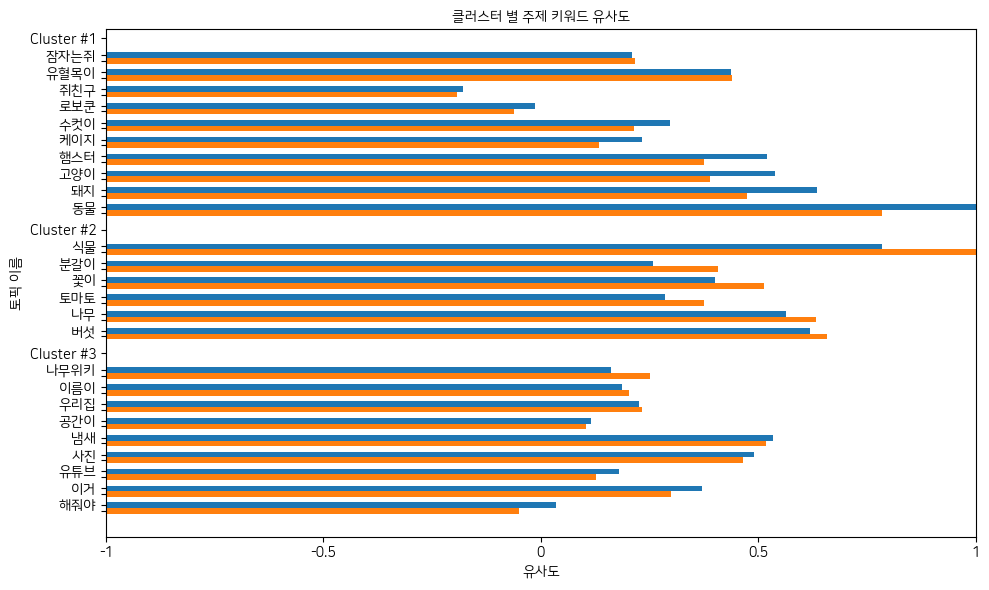

In [32]:
clustered_topics_ids = clusterByHand(cRatio, selected_topics_ids, selected_topic_names, galleries, post_counts, ord)
ratios = [[] for i in range(3)]
for i in range(3):
  ratio = []

  topics_list = []
  for j in range(len(clustered_topics_ids[i])):
    k = clustered_topics_ids[i][j]
    l, r = cRatio[k][0], cRatio[k][1]
    ratio.append(l / (l + r))
  ratios[i] = ratio

In [33]:
# hierarchical_topics

In [34]:
from scipy.stats import norm
import numpy as np

def plot_gaussian(data1, data2, data3):
    print(data1, data2, data3)
    mu1, std1 = np.mean(data1), np.std(data1)
    mu2, std2 = np.mean(data2), np.std(data2)
    mu3, std3 = np.mean(data3), np.std(data3)

    xmin = min(min(data1), min(data2), min(data3))
    xmax = max(max(data1), max(data2), max(data3))
    x = np.linspace(0, 1, 1000)

    p1 = norm.pdf(x, mu1, std1)
    p2 = norm.pdf(x, mu2, std2)
    p3 = norm.pdf(x, mu3, std3)

    plt.plot(x, p1, 'r', linewidth=2, label=f"Data1: µ={mu1:.2f}, σ={std1:.2f}")
    plt.plot(x, p2, 'g', linewidth=2, label=f"Data2: µ={mu2:.2f}, σ={std2:.2f}")
    plt.plot(x, p3, 'b', linewidth=2, label=f"Data3: µ={mu3:.2f}, σ={std3:.2f}")


    plt.title("Gaussian Distributions")
    plt.legend()
    plt.show()

# plot_gaussian(*ratios)

In [35]:
import warnings
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

def clusterByHand2(table, selected_topics_ids, selected_topic_names, galleries, post_counts, ord):
  selected_topic_counts = [[0, 0] for _ in range(len(selected_topics_ids))]
  for i in range(len(selected_topics_ids)):
    selected_topic_counts[i][0] += table[int(selected_topics_ids[i])][0]
    selected_topic_counts[i][1] += table[int(selected_topics_ids[i])][1]
  dic = dict()
  n_clusters = len(galleries) + 1
  idx2name = dict(zip(selected_topics_ids,selected_topic_names))
  name2idx = dict(zip(selected_topic_names,selected_topics_ids))
  clustered_topics_name=[[],[],[]]
  for i in range(len(ord)):
    clustered_topics_name[ord[i]].append(selected_topic_names[i])

  clustered_topics_count = [[] for _ in range(n_clusters)]
  clustered_topics = [[] for _ in range(n_clusters)]
  for i in range(len(clustered_topics_name)):
    for ele in clustered_topics_name[i]:
      clustered_topics[i].append(name2idx[ele])
  for r in clustered_topics_name:
    print(r)
  cluster_sums = []
  for idx, cluster in enumerate(clustered_topics):
    total_sum = 0
    for parent_id in cluster:
      row = hierarchical_topics[hierarchical_topics['Parent_ID'] == parent_id].iloc[0]
      topic_ids = row['Topics']
      cluster_sum = sum(post_counts[topic_id] for topic_id in topic_ids)
      clustered_topics_count[idx].append(cluster_sum)
      total_sum += cluster_sum
    cluster_sums.append(total_sum)
  if verify:
    clustered_count = [[0, 0] for _ in range(n_clusters)]
    for i in range(n_clusters):
      for j in clustered_topics[i]:
        clustered_count[i][0] += table[int(j)][0]
        clustered_count[i][1] += table[int(j)][1]

    for i in range(n_clusters):
      l, r = clustered_count[i][0], clustered_count[i][1]
      for j in range(len(clustered_topics[i])):
        k = clustered_topics[i][j]
        l, r = table[int(k)][0], table[int(k)][1]
    clusters = []

    for i in range(n_clusters):
      cluster_info = {}
      l, r = clustered_count[i][0], clustered_count[i][1]
      cluster_info['name'] = f'Cluster #{i+1}'
      cluster_info['value'] = l + r
      cluster_info['distribution'] = [100 * l / (l + r), 100 * r / (l + r)]

      topics_list = []
      for j in range(len(clustered_topics[i])):
        topic_info = {}
        k = clustered_topics[i][j]
        l, r = table[int(k)][0], table[int(k)][1]
        topic_info['name'] = clustered_topics_name[i][j]
        topic_info['value'] = l + r
        topic_info['distribution'] = [100 * l / (l + r), 100 * r / (l + r)]
        topics_list.append(topic_info)

      cluster_info['topics'] = topics_list
      clusters.append(cluster_info)

    font_path = '/content/drive/MyDrive/NanumSquareRoundR.ttf'
    fontprop = fm.FontProperties(fname=font_path, size=10)
    plt.rcParams["font.family"] = fontprop.get_name()
    plt.rcParams['axes.unicode_minus'] = False

    def sort_topics_by_distribution(cluster):
      cluster['topics'] = sorted(cluster['topics'], key=lambda x: x['distribution'][0], reverse=True)

    for cluster in clusters:
      sort_topics_by_distribution(cluster)

    # 서브플롯을 위한 열의 수 계산
    n_cols = len(clusters)
    fig, axes = plt.subplots(1, n_cols, figsize=(10 * n_cols, 6))  # n_cols 만큼의 서브플롯 생성

    for idx, cluster in enumerate(clusters):
        ax = axes[idx]
        y_positions = []
        y_labels = []
        current_y = 0
        bar_width = 0.4

        y_positions.append(current_y)
        y_labels.append(cluster['name'])
        for topic in cluster['topics']:
            current_y -= 1
            y_positions.append(current_y)
            y_labels.append(topic['name'])
            ax.barh(current_y, topic['distribution'][0], color='C0', height=bar_width, label=topic['name'])
            # ax.barh(current_y, topic['distribution'][1], color='g', left=topic['distribution'][0], height=bar_width)
        current_y -= 2

        galleries2 = galleries.copy()
        galleries2.append('Etc')
        ax.set_yticks(y_positions)
        ax.set_yticklabels(y_labels, fontproperties=fontprop)
        ax.set_xlabel('실제 분포', fontproperties=fontprop)
        ax.set_title(f'각 주제 별 {galleries2[0]} 커뮤니티 비율', fontproperties=fontprop)
        # ax.legend(loc='upper right', prop=fontprop)
        ax.set_xlim([0,100])
    plt.tight_layout()
    plt.show()

    return clustered_topics

['로보쿤', '돼지', '수컷이', '유혈목이', '케이지', '동물', '햄스터', '쥐친구', '고양이', '잠자는쥐']
['식물', '분갈이', '버섯', '나무', '꽃이', '토마토']
['사진', '해줘야', '이름이', '공간이', '이거', '유튜브', '우리집', '냄새', '나무위키']


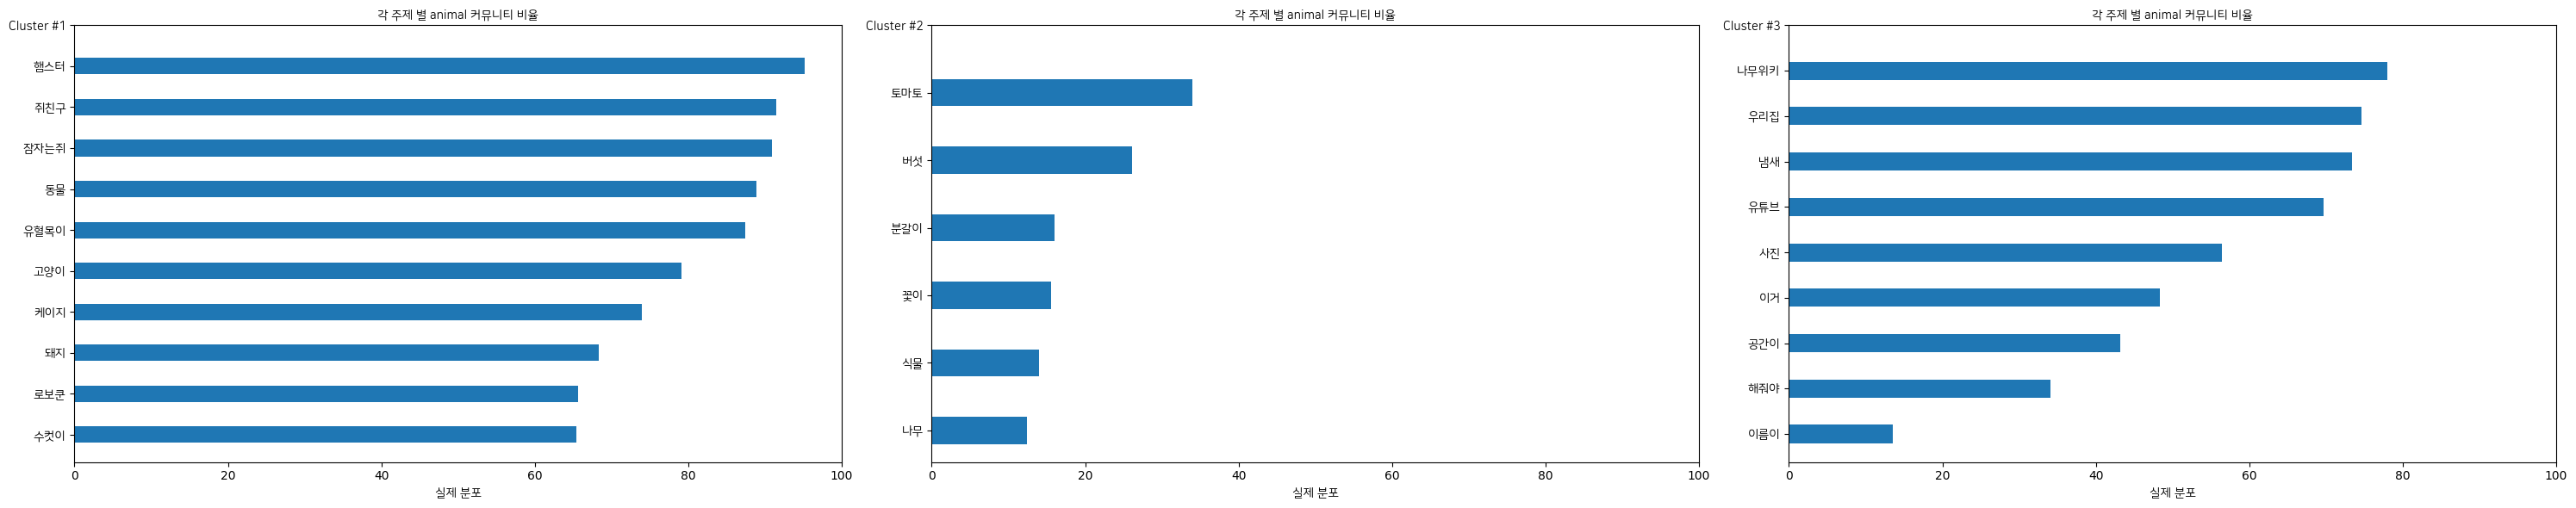

In [36]:
clustered_topics_ids = clusterByHand2(table, selected_topics_ids, selected_topic_names, galleries, post_counts, ord)
ratios = [[] for i in range(3)]
for i in range(3):
  ratio = []

  topics_list = []
  for j in range(len(clustered_topics_ids[i])):
    k = clustered_topics_ids[i][j]
    l, r = table[int(k)][0], table[int(k)][1]
    ratio.append(l / (l + r))
  ratios[i] = ratio

[0.6566626650660264, 0.6836734693877551, 0.6547619047619048, 0.8746594005449592, 0.7391304347826086, 0.8888888888888888, 0.9519133084998307, 0.9145299145299145, 0.7909604519774012, 0.9090909090909091] [0.13931623931623932, 0.1598360655737705, 0.26170798898071623, 0.12385321100917432, 0.15591670898933468, 0.3398328690807799] [0.564625850340136, 0.34104046242774566, 0.13582342954159593, 0.4318181818181818, 0.48300536672629696, 0.6971428571428572, 0.7467700258397932, 0.7336683417085427, 0.7802547770700637]


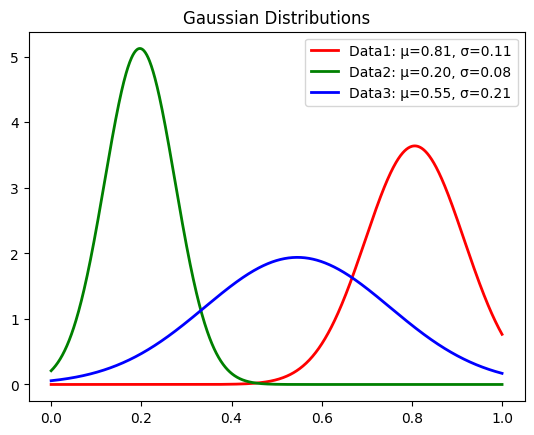

In [37]:
plot_gaussian(*ratios)